In [1]:
import pandas as pd
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt

In [33]:
split = 1
path = f"/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_ood_{split}.h5ad"
adata_ood = sc.read(path)
ood_conditions = adata_ood.obs["condition"].cat.categories

In [34]:
df = pd.read_csv("gse_score_1.csv")
df = df.drop(columns=["Unnamed: 0"])
df = df.T
df["score"] = df[0]
df["condition"] = df.index

In [35]:
def get_mode(x):
    if "pred" in x["condition"]:
        return "ood_pred"
    if x["condition"] in ood_conditions:
        return "ood_true"
    return "seen"

In [36]:
df["mode"] = df.apply(get_mode, axis=1)

In [37]:
df.head()

,0,score,condition,mode
Alvespimycin+Pirarubicin,-0.845729,-0.845729,Alvespimycin+Pirarubicin,seen
Cediranib+PCI-34051,0.817825,0.817825,Cediranib+PCI-34051,seen
Dacinostat+Danusertib,-0.847019,-0.847019,Dacinostat+Danusertib,seen
Dacinostat+Dasatinib,-0.852165,-0.852165,Dacinostat+Dasatinib,seen
Dacinostat+PCI-34051,-0.849137,-0.849137,Dacinostat+PCI-34051,seen


In [38]:
df_true = df[df["mode"]=="ood_true"]
df_pred = df[df["mode"]=="ood_pred"]

In [39]:
df_true["rank_true"] = df_true["score"].rank()
df_pred["rank_pred"] = df_pred["score"].rank()

/tmp/ipykernel_881079/1674682805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true["rank_true"] = df_true["score"].rank()
/tmp/ipykernel_881079/1674682805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred["rank_pred"] = df_pred["score"].rank()


In [40]:
df_pred["condition"] = df_pred.index
df_pred["condition"] = df_pred.apply(lambda x: x["condition"].split('_', 1)[0], axis=1)

/tmp/ipykernel_881079/2401045840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred["condition"] = df_pred.index
/tmp/ipykernel_881079/2401045840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred["condition"] = df_pred.apply(lambda x: x["condition"].split('_', 1)[0], axis=1)


In [41]:
df_pred = df_pred.set_index("condition")

In [42]:
df_res = pd.concat((df_true, df_pred), axis=1)

In [43]:
df_res

,0,score,condition,mode,rank_true,0,score,mode,rank_pred
Givinostat+Dasatinib,-0.857481,-0.857481,Givinostat+Dasatinib,ood_true,2.0,-0.209769,-0.209769,ood_pred,4.0
Givinostat+SRT1720,-0.716411,-0.716411,Givinostat+SRT1720,ood_true,6.0,-0.205829,-0.205829,ood_pred,5.0
Panobinostat+Dasatinib,-0.785814,-0.785814,Panobinostat+Dasatinib,ood_true,4.0,-0.644666,-0.644666,ood_pred,1.0
Panobinostat+PCI-34051,-0.787106,-0.787106,Panobinostat+PCI-34051,ood_true,3.0,-0.644366,-0.644366,ood_pred,2.0
Panobinostat+SRT2104,-0.782268,-0.782268,Panobinostat+SRT2104,ood_true,5.0,-0.639641,-0.639641,ood_pred,3.0
SRT3025+Cediranib,0.663243,0.663243,SRT3025+Cediranib,ood_true,7.0,0.469788,0.469788,ood_pred,6.0
control+Dasatinib,-0.921644,-0.921644,control+Dasatinib,ood_true,1.0,0.569771,0.569771,ood_pred,7.0


/tmp/ipykernel_881079/3574232351.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_res['rank_true'][i] + 0.05, df_res['rank_pred'][i], df_res['condition'][i], fontsize=9)


Text(0, 0.5, 'Predicted rank among OOD\n drugs of pathway activation')

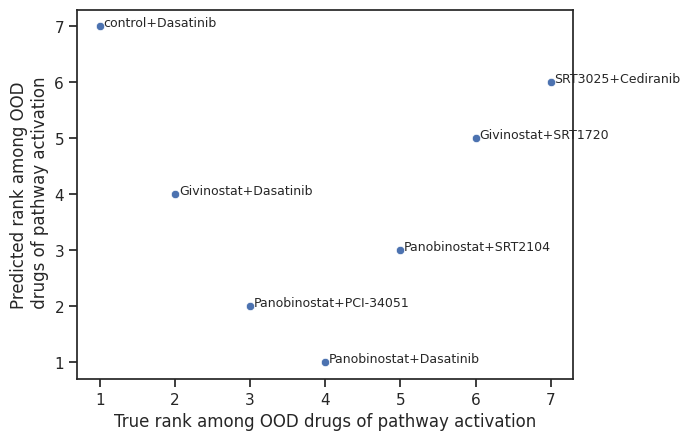

In [44]:
sns.scatterplot(df_res, x="rank_true", y="rank_pred")
for i in range(df_res.shape[0]):
    plt.text(df_res['rank_true'][i] + 0.05, df_res['rank_pred'][i], df_res['condition'][i], fontsize=9)
plt.xlabel("True rank among OOD drugs of pathway activation")
plt.ylabel("Predicted rank among OOD\n drugs of pathway activation")

/tmp/ipykernel_881079/2991197323.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df_res['rank_true'][i] > 5:  # Adjusting for true rank > 5
/tmp/ipykernel_881079/2991197323.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(df_res['rank_true'][i] + 0.1, df_res['rank_pred'][i], df_res['condition'][i], fontsize=10, color='black')
/tmp/ipykernel_881079/2991197323.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax

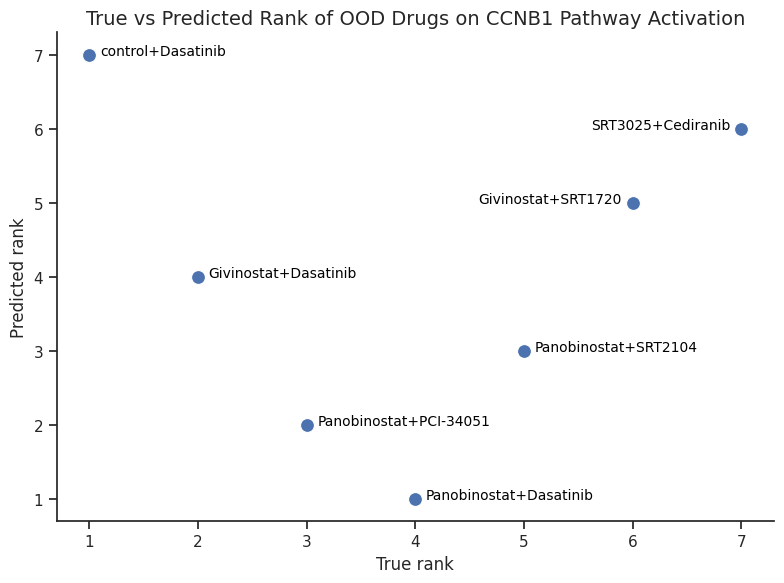

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.set(style="ticks")

# Create scatterplot with labels
ax = sns.scatterplot(data=df_res, x="rank_true", y="rank_pred", s=100)

# Add labels to each point
for i in range(df_res.shape[0]):
    if df_res['rank_true'][i] > 5:  # Adjusting for true rank > 5
        ax.text(df_res['rank_true'][i] - 0.1, df_res['rank_pred'][i], df_res['condition'][i], fontsize=10, color='black', ha='right')
    else:
        ax.text(df_res['rank_true'][i] + 0.1, df_res['rank_pred'][i], df_res['condition'][i], fontsize=10, color='black')


# Set axis labels and title
plt.xlabel("True rank", fontsize=12)
plt.ylabel("Predicted rank", fontsize=12)
plt.title("True vs Predicted Rank of OOD Drugs on CCNB1 Pathway Activation", fontsize=14)

sns.despine()
# Display the plot
plt.tight_layout()
plt.show()

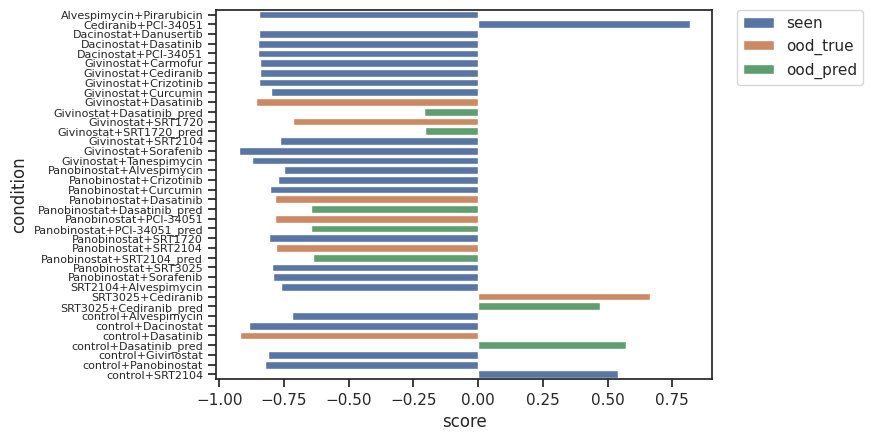

In [46]:
import matplotlib.pyplot as plt
sns.barplot(df, y="condition", x="score", hue="mode")
plt.xticks(rotation=0)
plt.yticks(fontsize=8) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


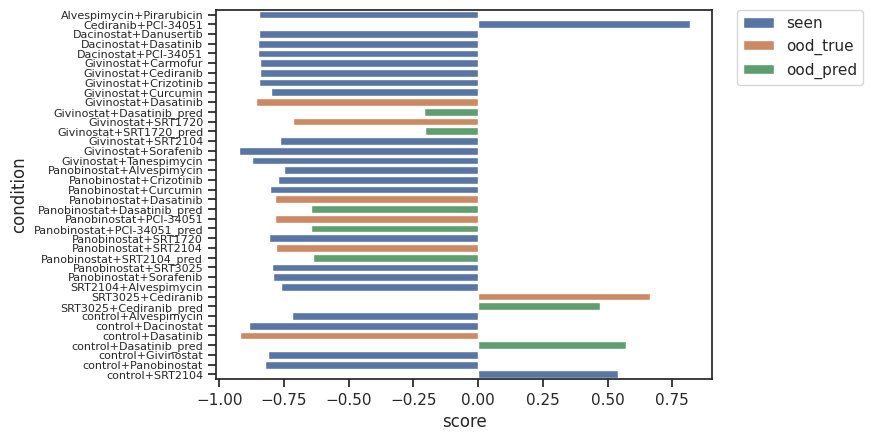

In [47]:
import matplotlib.pyplot as plt
sns.barplot(df, y="condition", x="score", hue="mode")
plt.xticks(rotation=0)
plt.yticks(fontsize=8) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


In [48]:
df_res["rank_true"].corr(df_res["rank_pred"], method="spearman")

0.0

In [57]:
ood_split = 4


adata_train_path = f"/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_train_{ood_split}.h5ad"
adata_test_path = f"/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_test_{ood_split}.h5ad"
adata_ood_path = f"/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/adata_ood_{ood_split}.h5ad"

In [58]:

adata_test = sc.read(adata_test_path)
adata_ood = sc.read(adata_ood_path)

In [59]:
adata_ood.obs["condition"].cat.categories

Index(['Cediranib+PCI-34051', 'Givinostat+Crizotinib', 'Givinostat+SRT2104',
       'Givinostat+Sorafenib', 'control', 'control+Givinostat',
       'control+SRT2104'],
      dtype='object')

In [60]:
adata_test.obs["condition"].cat.categories

Index(['Alvespimycin+Pirarubicin', 'Dacinostat+Danusertib',
       'Dacinostat+Dasatinib', 'Dacinostat+PCI-34051', 'Givinostat+Carmofur',
       'Givinostat+Cediranib', 'Givinostat+Curcumin', 'Givinostat+Dasatinib',
       'Givinostat+SRT1720', 'Givinostat+Tanespimycin',
       'Panobinostat+Alvespimycin', 'Panobinostat+Crizotinib',
       'Panobinostat+Curcumin', 'Panobinostat+Dasatinib',
       'Panobinostat+PCI-34051', 'Panobinostat+SRT1720',
       'Panobinostat+SRT2104', 'Panobinostat+SRT3025',
       'Panobinostat+Sorafenib', 'SRT2104+Alvespimycin', 'SRT3025+Cediranib',
       'control', 'control+Alvespimycin', 'control+Dacinostat',
       'control+Dasatinib', 'control+Panobinostat'],
      dtype='object')

In [ ]:
'Alvespimycin+Pirarubicin', 'Dacinostat+Danusertib',
       'Dacinostat+Dasatinib', 'Dacinostat+PCI-34051', 'Givinostat+Carmofur',
       'Givinostat+Cediranib', 'Givinostat+Curcumin', 'Givinostat+Dasatinib',
       'Givinostat+SRT1720', 'Givinostat+Tanespimycin',
       'Panobinostat+Alvespimycin', 'Panobinostat+Crizotinib',
       'Panobinostat+Curcumin', 'Panobinostat+Dasatinib',
       'Panobinostat+PCI-34051', 'Panobinostat+SRT1720',
       'Panobinostat+SRT2104', 'Panobinostat+SRT3025',
       'Panobinostat+Sorafenib', 'SRT2104+Alvespimycin', 'SRT3025+Cediranib',
        
'Cediranib+PCI-34051', 'Givinostat+Crizotinib', 'Givinostat+SRT2104',


In [ ]:
'control+Alvespimycin', 
'control+Dacinostat',
'control+Dasatinib', 
'control+Panobinostat'
'control+Givinostat',
'control+SRT2104'

In [ ]:
'Panobinostat+Alvespimycin, 
'SRT2104+Alvespimycin',
'Dacinostat+Dasatinib', 
'Givinostat+SRT2104', 
'Panobinostat+SRT2104', 
'Givinostat+Dasatinib', 
'Panobinostat+Dasatinib',
'Panobinostat+Dasatinib'
